<a href="https://colab.research.google.com/github/Emaan10/Elevvo-ML.internshipTasks/blob/main/Elevvo_Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Load the Dataset

In [ ]:
file_path = "/content/drive/MyDrive/StudentPerformanceFactors.csv"
df = pd.read_csv(file_path)
print(df.head())

   Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0             23          84                  Low                High   
1             19          64                  Low              Medium   
2             24          98               Medium              Medium   
3             29          89                  Low              Medium   
4             19          92               Medium              Medium   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level  \
0                         No            7               73              Low   
1                         No            8               59              Low   
2                        Yes            7               91           Medium   
3                        Yes            8               98           Medium   
4                        Yes            6               65           Medium   

  Internet_Access  Tutoring_Sessions Family_Income Teacher_Quality  \
0             Ye

In [ ]:
df = df.dropna()
df = df.rename(columns=lambda x: x.strip().lower().replace(" ", "_"))

if 'exam_score' not in df.columns:
    raise ValueError("Please check your column names — expected 'exam_score'.")

Identify numeric features

In [ ]:
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
if 'exam_score' in numeric_features:
    numeric_features.remove('exam_score')

print("\nNumeric Features Available:", numeric_features)


Numeric Features Available: ['hours_studied', 'attendance', 'sleep_hours', 'previous_scores', 'tutoring_sessions', 'physical_activity']


 Visualization (hours_studied vs exam_score)

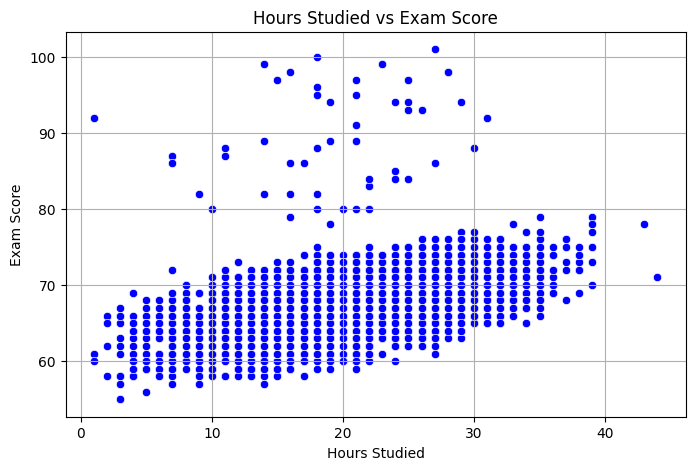

In [ ]:
# Step 3: Visualization (study_hours vs exam_score)
if 'hours_studied' in df.columns:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=df, x='hours_studied', y='exam_score', color='blue')
    plt.title("Hours Studied vs Exam Score")
    plt.xlabel("Hours Studied")
    plt.ylabel("Exam Score")
    plt.grid(True)
    plt.show()

Linear Regression and Polynomial Regression

In [ ]:
# Step 4: Helper function for training & evaluation
def train_and_evaluate(x, y, poly_degree=2):
    x_train, x_test, y_train, y_test = train_test_split(
        x, y,
        test_size=0.3,
        random_state=42
    )

    #Linear Regression
    lin_model = LinearRegression()
    lin_model.fit(x_train, y_train)
    y_pred_lin = lin_model.predict(x_test)

    mae_lin = mean_absolute_error(y_test, y_pred_lin)
    mse_lin = mean_squared_error(y_test, y_pred_lin)
    rmse_lin = np.sqrt(mse_lin)   # <-- Added RMSE
    r2_lin = r2_score(y_test, y_pred_lin)

    print(f"Linear Regression Metrics:")
    print(f"  MAE: {mae_lin:.2f}")
    print(f"  MSE: {mse_lin:.2f}")
    print(f"  RMSE: {rmse_lin:.2f}")   # <-- Added RMSE print
    print(f"  R-squared: {r2_lin:.2f}")

    # Polynomial Regression
    poly_model = Pipeline([
        ('poly_features', PolynomialFeatures(degree=poly_degree)),
        ('linear_regression', LinearRegression())
    ])
    poly_model.fit(x_train, y_train)
    y_pred_poly = poly_model.predict(x_test)

    mae_poly = mean_absolute_error(y_test, y_pred_poly)
    mse_poly = mean_squared_error(y_test, y_pred_poly)
    rmse_poly = np.sqrt(mse_poly)   # <-- Added RMSE
    r2_poly = r2_score(y_test, y_pred_poly)

    print(f"\nPolynomial Regression (Degree {poly_degree}) Metrics:")
    print(f"  MAE: {mae_poly:.2f}")
    print(f"  MSE: {mse_poly:.2f}")
    print(f"  RMSE: {rmse_poly:.2f}")   # <-- Added RMSE print
    print(f"  R-squared: {r2_poly:.2f}")

    return {
        "Linear": {"MAE": mae_lin, "MSE": mse_lin, "R2": r2_lin},
        "Polynomial": {"MAE": mae_poly, "MSE": mse_poly, "R2": r2_poly}
    }


# Define features (x) and target (y)
x = df[['hours_studied']] # Using only 'hours_studied' as feature for now
y = df['exam_score']

# Training and evaluating the model
train_and_evaluate(x, y)

Linear Regression Metrics:
  MAE: 2.52
  MSE: 12.17
  RMSE: 3.49
  R-squared: 0.20

Polynomial Regression (Degree 2) Metrics:
  MAE: 2.52
  MSE: 12.16
  RMSE: 3.49
  R-squared: 0.20


{'Linear': {'MAE': 2.516789775382383,
  'MSE': 12.168329506934915,
  'R2': 0.2046615457598585},
 'Polynomial': {'MAE': 2.51504982089814,
  'MSE': 12.163283440885456,
  'R2': 0.20499136345336222}}

Comparing single vs multiple features

In [ ]:
y = df['exam_score']
print(y.head())

0    67
1    61
2    74
3    71
4    70
Name: exam_score, dtype: int64


Single feature: hours_studied

In [ ]:
if 'hours_studied' in df.columns:
    results_single = train_and_evaluate(df[['hours_studied']], y)
else:
    results_single = None

Linear Regression Metrics:
  MAE: 2.52
  MSE: 12.17
  RMSE: 3.49
  R-squared: 0.20

Polynomial Regression (Degree 2) Metrics:
  MAE: 2.52
  MSE: 12.16
  RMSE: 3.49
  R-squared: 0.20


Multiple features: all numeric predictors

In [ ]:
if numeric_features:
    results_multi = train_and_evaluate(df[numeric_features], y)
else:
    raise ValueError("No numeric predictor features available.")

Linear Regression Metrics:
  MAE: 1.31
  MSE: 5.90
  RMSE: 2.43
  R-squared: 0.61

Polynomial Regression (Degree 2) Metrics:
  MAE: 1.33
  MSE: 5.95
  RMSE: 2.44
  R-squared: 0.61


Results

In [ ]:
print("\n Model Performance")
if results_single:
    print("\nSingle Feature (hours studied):")
    for model, metrics in results_single.items():
        print(f"{model}: {metrics}")

print("\nMultiple Features (numeric predictors):")
for model, metrics in results_multi.items():
    print(f"{model}: {metrics}")


 Model Performance

Single Feature (hours studied):
Linear: {'R2': 0.2046615457598585, 'MAE': 2.516789775382383, 'MSE': 12.168329506934915, 'RMSE': 3.49}
Polynomial: {'R2': 0.20499136345336222, 'MAE': 2.51504982089814, 'MSE': 12.163283440885456, 'RMSE': 3.49}

Multiple Features (numeric predictors):
Linear: {'R2': 0.6145973284864972, 'MAE': 1.3114558772859621, 'MSE': 5.896491832913825, 'RMSE': 2.44}
Polynomial: {'R2': 0.6113216286674801, 'MAE': 1.3250556146406045, 'MSE': 5.946608603391986, 'RMSE': 2.44}


In [ ]:
print("\nModel Performance")

if results_single:
    print("\nSingle Feature (hours studied):")
    for model, metrics in results_single.items():
        print(f"{model}:")
        print(f"  Mean Absolute Error: {metrics['MAE']}")
        print(f"  Mean Squared Error: {metrics['MSE']}")
        print(f"  Root Mean Squared Error: {metrics['RMSE']}")
        print(f"  R Square: {metrics['R2']}")

print("\nMultiple Features (numeric predictors):")
for model, metrics in results_multi.items():
    print(f"{model}:")
    print(f" Mean Absolute Error: {metrics['MAE']}")
    print(f" Mean Squared Error: {metrics['MSE']}")
    print(f" Root Mean Squared Error: {metrics['RMSE']}")
    print(f" R Square: {metrics['R2']}")



Model Performance

Single Feature (hours studied):
Linear:
  Mean Absolute Error: 2.516789775382383
  Mean Squared Error: 12.168329506934915
  Root Mean Squared Error: 3.49
  R Square: 0.2046615457598585
Polynomial:
  Mean Absolute Error: 2.51504982089814
  Mean Squared Error: 12.163283440885456
  Root Mean Squared Error: 3.49
  R Square: 0.20499136345336222

Multiple Features (numeric predictors):
Linear:
 Mean Absolute Error: 1.3114558772859621
 Mean Squared Error: 5.896491832913825
 Root Mean Squared Error: 2.44
 R Square: 0.6145973284864972
Polynomial:
 Mean Absolute Error: 1.3250556146406045
 Mean Squared Error: 5.946608603391986
 Root Mean Squared Error: 2.44
 R Square: 0.6113216286674801


Visualization

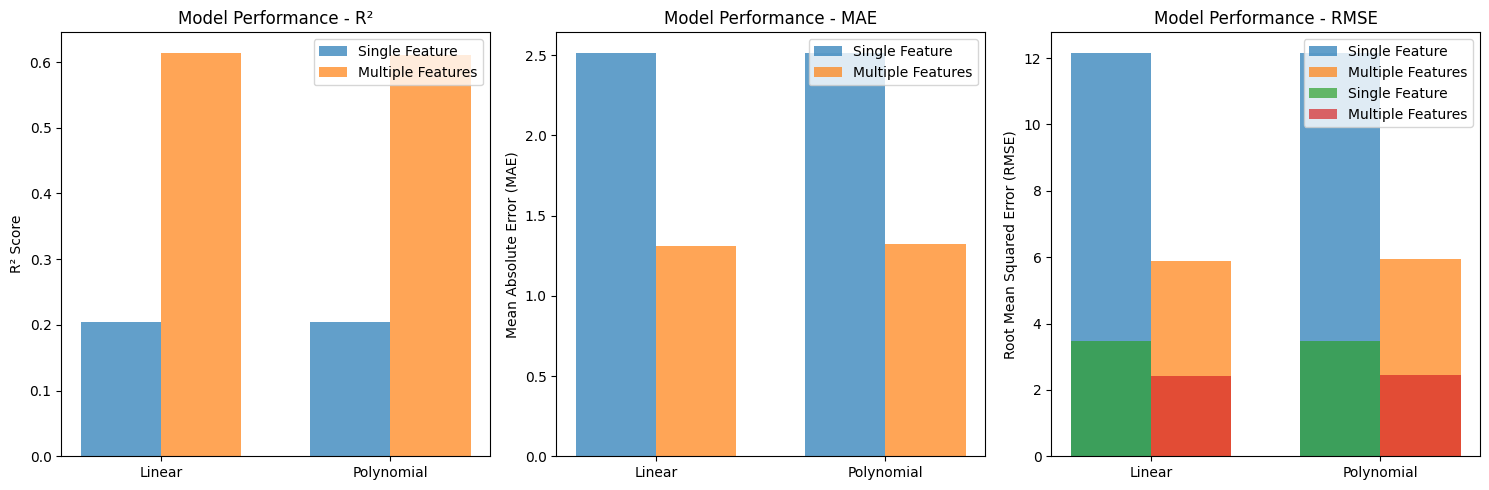

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Model Performance Data
results_single = {
    'Linear': {
        'R2': 0.2046615457598585,
        'MAE': 2.516789775382383,
        'MSE': 12.168329506934915,
        'RMSE': 3.49
    },
    'Polynomial': {
        'R2': 0.20499136345336222,
        'MAE': 2.51504982089814,
        'MSE': 12.163283440885456,
        'RMSE': 3.49
    }
}

results_multi = {
    'Linear': {
        'R2': 0.6145973284864972,
        'MAE': 1.3114558772859621,
        'MSE': 5.896491832913825,
        'RMSE': 2.44
    },
    'Polynomial': {
        'R2': 0.6113216286674801,
        'MAE': 1.3250556146406045,
        'MSE': 5.946608603391986,
        'RMSE': 2.44
    }
}

# Extract model names
models = list(results_single.keys())
x = np.arange(len(models))
bar_width = 0.35

# Extract metrics
r2_single = [results_single[m]["R2"] for m in models]
r2_multi = [results_multi[m]["R2"] for m in models]
mae_single = [results_single[m]["MAE"] for m in models]
mae_multi = [results_multi[m]["MAE"] for m in models]
mse_single = [results_single[m]["MSE"] for m in models]
mse_multi = [results_multi[m]["MSE"] for m in models]


plt.figure(figsize=(15, 5))

#1. R²:
plt.subplot(1, 3, 1)
plt.bar(x - bar_width/2, r2_single, width=bar_width, label='Single Feature', alpha=0.7)
plt.bar(x + bar_width/2, r2_multi, width=bar_width, label='Multiple Features', alpha=0.7)
plt.xticks(x, models)
plt.ylabel('R² Score')
plt.title('Model Performance - R²')
plt.legend()

#2. MAE:
plt.subplot(1, 3, 2)
plt.bar(x - bar_width/2, mae_single, width=bar_width, label='Single Feature', alpha=0.7)
plt.bar(x + bar_width/2, mae_multi, width=bar_width, label='Multiple Features', alpha=0.7)
plt.xticks(x, models)
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Model Performance - MAE')
plt.legend()

#3. MSE:
plt.subplot(1, 3, 3)
plt.bar(x - bar_width/2, mse_single, width=bar_width, label='Single Feature', alpha=0.7)
plt.bar(x + bar_width/2, mse_multi, width=bar_width, label='Multiple Features', alpha=0.7)
plt.xticks(x, models)
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Model Performance - MSE')
plt.legend()


# RMSE:
rmse_single = np.sqrt(mse_single)
rmse_multi  = np.sqrt(mse_multi)

plt.subplot(1, 3, 3)
plt.bar(x - bar_width/2, rmse_single, width=bar_width, label='Single Feature', alpha=0.7)
plt.bar(x + bar_width/2, rmse_multi, width=bar_width, label='Multiple Features', alpha=0.7)
plt.xticks(x, models)
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.title('Model Performance - RMSE')
plt.legend()

plt.tight_layout()
plt.show()

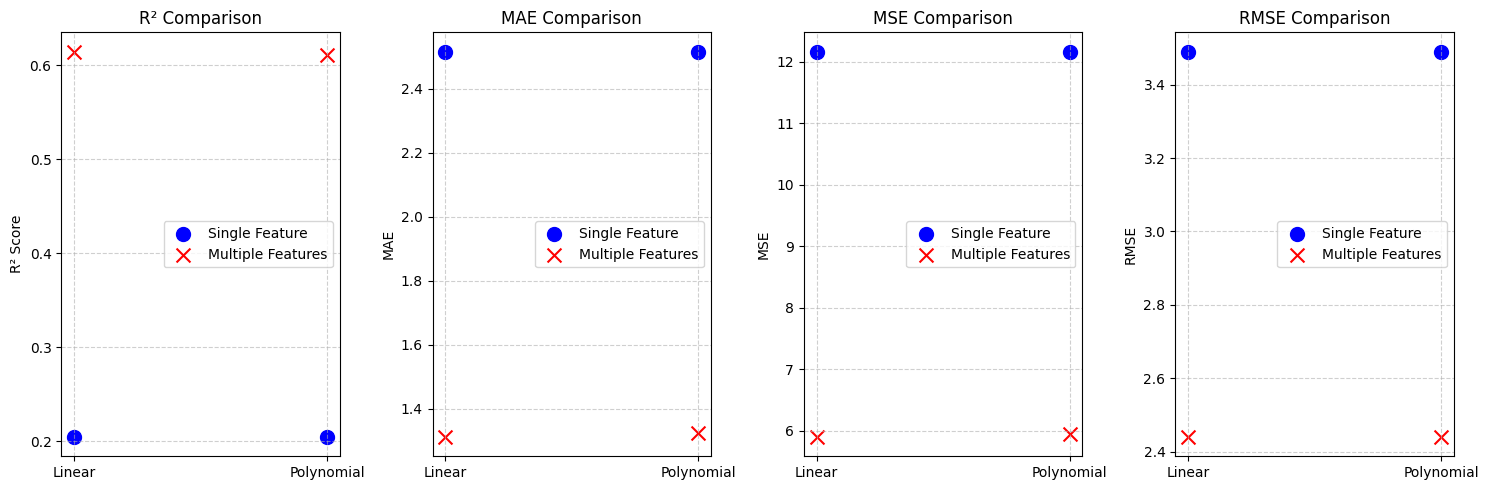

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Model Performance Data
results_single = {
    'Linear': {
        'R2': 0.2046615457598585,
        'MAE': 2.516789775382383,
        'MSE': 12.168329506934915,
        'RMSE': 3.49
    },
    'Polynomial': {
        'R2': 0.20499136345336222,
        'MAE': 2.51504982089814,
        'MSE': 12.163283440885456,
        'RMSE': 3.49
    }
}

results_multi = {
    'Linear': {
        'R2': 0.6145973284864972,
        'MAE': 1.3114558772859621,
        'MSE': 5.896491832913825,
        'RMSE': 2.44
    },
    'Polynomial': {
        'R2': 0.6113216286674801,
        'MAE': 1.3250556146406045,
        'MSE': 5.946608603391986,
        'RMSE': 2.44
    }
}

# Extract model names
models = list(results_single.keys())
x = np.arange(len(models))

# Extract metrics
r2_single = [results_single[m]["R2"] for m in models]
r2_multi  = [results_multi[m]["R2"] for m in models]

mae_single = [results_single[m]["MAE"] for m in models]
mae_multi  = [results_multi[m]["MAE"] for m in models]

mse_single = [results_single[m]["MSE"] for m in models]
mse_multi  = [results_multi[m]["MSE"] for m in models]

rmse_single = [results_single[m]["RMSE"] for m in models]
rmse_multi  = [results_multi[m]["RMSE"] for m in models]

plt.figure(figsize=(15, 5))

# 1. R² Scatter
plt.subplot(1, 4, 1)
plt.scatter(x, r2_single, label="Single Feature", color="blue", s=100, marker="o")
plt.scatter(x, r2_multi, label="Multiple Features", color="red", s=100, marker="x")
plt.xticks(x, models)
plt.ylabel("R² Score")
plt.title("R² Comparison")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)

# 2. MAE Scatter
plt.subplot(1, 4, 2)
plt.scatter(x, mae_single, label="Single Feature", color="blue", s=100, marker="o")
plt.scatter(x, mae_multi, label="Multiple Features", color="red", s=100, marker="x")
plt.xticks(x, models)
plt.ylabel("MAE")
plt.title("MAE Comparison")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)

# 3. MSE Scatter
plt.subplot(1, 4, 3)
plt.scatter(x, mse_single, label="Single Feature", color="blue", s=100, marker="o")
plt.scatter(x, mse_multi, label="Multiple Features", color="red", s=100, marker="x")
plt.xticks(x, models)
plt.ylabel("MSE")
plt.title("MSE Comparison")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)

# 4. RMSE Scatter
plt.subplot(1, 4, 4)
plt.scatter(x, rmse_single, label="Single Feature", color="blue", s=100, marker="o")
plt.scatter(x, rmse_multi, label="Multiple Features", color="red", s=100, marker="x")
plt.xticks(x, models)
plt.ylabel("RMSE")
plt.title("RMSE Comparison")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)

plt.tight_layout()
plt.show()
